In [1]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [2]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
from conf.settings import Settings
from estimator.estimatorUtils import callbacks,plot_latent_space
from estimator.VAE import VariationalAutoEncoder
from utils.utils import show_pictures,create_folder,process_data,show_reconstructed

In [5]:
settings = Settings()

In [6]:
img_height = settings.img_height
img_width = settings.img_width

batch_size = settings.batch_size
epochs = settings.epochs
learning_rate = settings.learning_rate

metrics_folder = settings.metrics_folder
model_folder = settings.model_folder

rmse_multiplier = settings.rmse_multiplier
latent_space = settings.latent_space

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

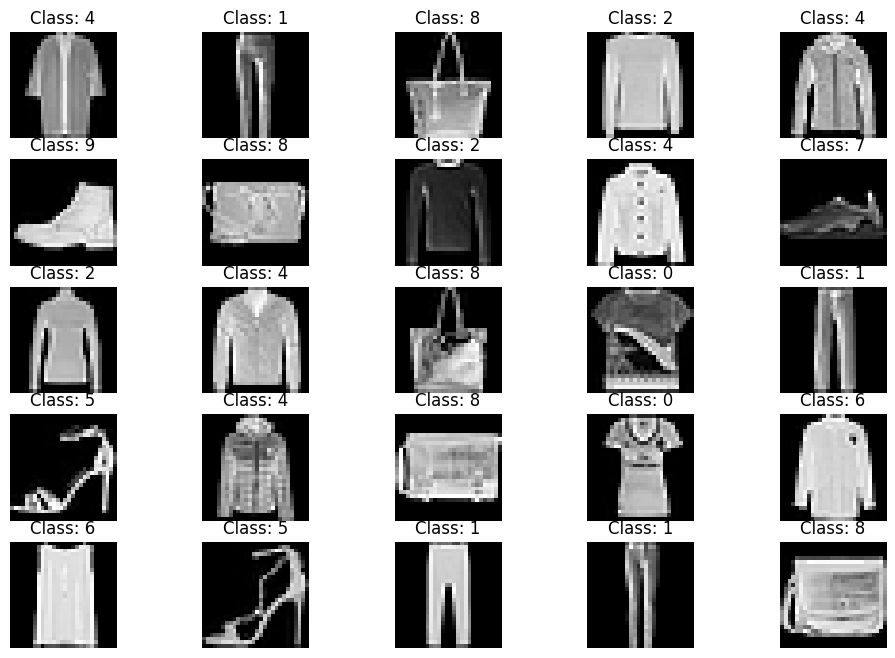

In [8]:
show_pictures(x_train,y_train)

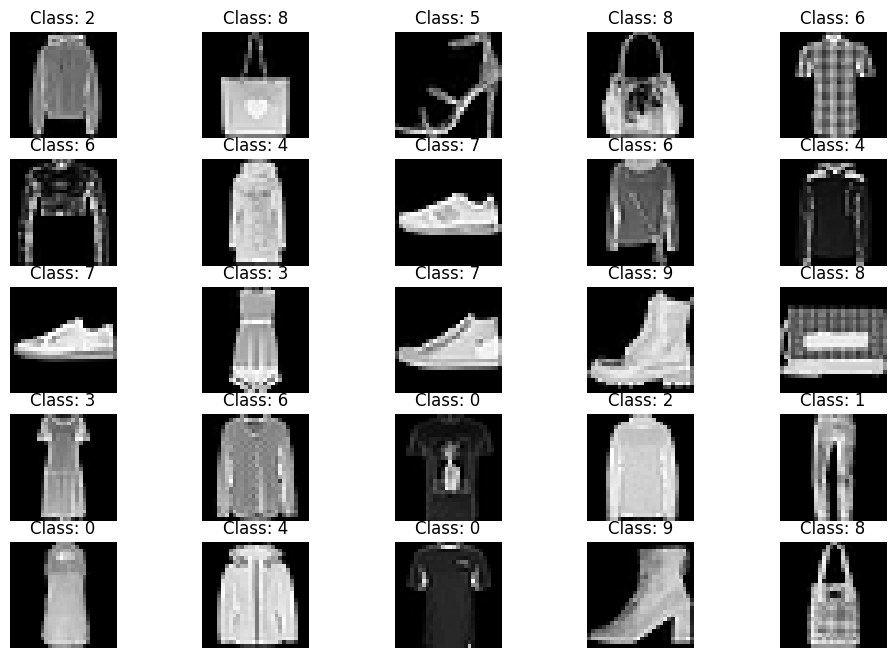

In [9]:
show_pictures(x_test, y_test)

In [10]:
create_folder(metrics_folder)
create_folder(model_folder)

In [11]:
x_train, y_train,x_test, y_test = process_data(x_train, y_train,x_test, y_test)

In [12]:
callbacks_list = callbacks()

In [13]:
estimator = VariationalAutoEncoder()

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
estimator.custom_compile(learning_rate = learning_rate, rmse_multiplier = rmse_multiplier)

In [15]:
history = estimator.full_model.fit(x_train,x_train,validation_data = (x_test,x_test), epochs = epochs,batch_size = batch_size, callbacks = callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - ETA: 0s - loss: 482.3058 - vae_r_loss: 469.8023 - vae_kl_loss: 12.5034

C:\Users\gonzalo\.conda\envs\generative_pokemon\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 15s 254us/sample - loss: 482.3058 - vae_r_loss: 469.8023 - vae_kl_loss: 12.5034 - val_loss: 648.5629 - val_vae_r_loss: 643.4544 - val_vae_kl_loss: 5.1085 - lr: 1.0000e-04
Epoch 2/100
60000/60000 [==============================] - 11s 185us/sample - loss: 391.8518 - vae_r_loss: 380.5023 - vae_kl_loss: 11.3495 - val_loss: 447.6997 - val_vae_r_loss: 438.1263 - val_vae_kl_loss: 9.5734 - lr: 1.0000e-04
Epoch 3/100
60000/60000 [==============================] - 11s 185us/sample - loss: 369.3924 - vae_r_loss: 359.0671 - vae_kl_loss: 10.3252 - val_loss: 341.7812 - val_vae_r_loss: 331.5862 - val_vae_kl_loss: 10.1951 - lr: 1.0000e-04
Epoch 4/100
60000/60000 [==============================] - 11s 186us/sample - loss: 352.6286 - vae_r_loss: 342.7946 - vae_kl_loss: 9.8342 - val_loss: 337.1619 - val_vae_r_loss: 327.1990 - val_vae_kl_loss: 9.9629 - lr: 1.0000e-04
Epoch 5/100
60000/60000 [==============================] - 11s 186us/sample - loss: 338.3876

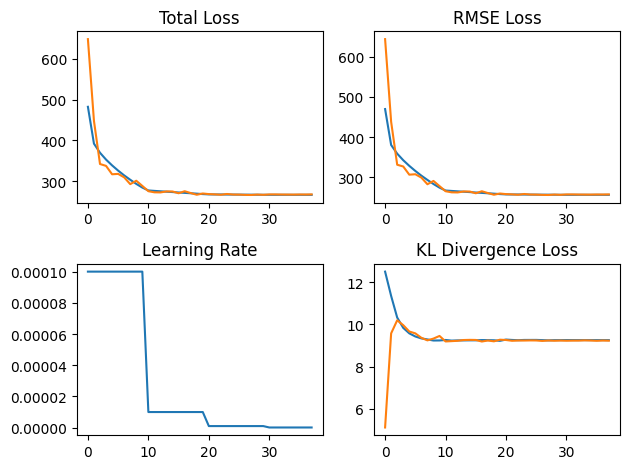

In [16]:
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(history.history["loss"])
axs[0, 0].plot(history.history["val_loss"])
axs[0, 0].set_title("Total Loss")

axs[0, 1].plot(history.history["vae_r_loss"])
axs[0, 1].plot(history.history["val_vae_r_loss"])
axs[0, 1].set_title("RMSE Loss")

axs[1, 1].plot(history.history["vae_kl_loss"])
axs[1, 1].plot(history.history["val_vae_kl_loss"])
axs[1, 1].set_title("KL Divergence Loss")

axs[1, 0].plot(history.history["lr"])
axs[1, 0].set_title("Learning Rate")
fig.tight_layout()
plt.savefig(metrics_folder + '/losses.png')

In [17]:
estimator.full_model.load_weights(model_folder + "/vae_weights.h5")

C:\Users\gonzalo\.conda\envs\generative_pokemon\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


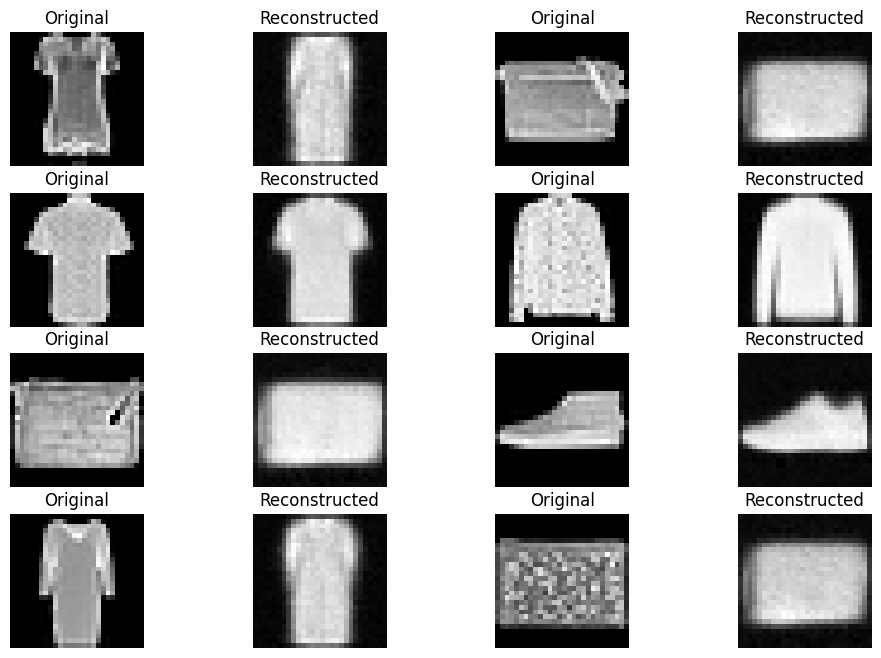

In [18]:
show_reconstructed(x_test,estimator)

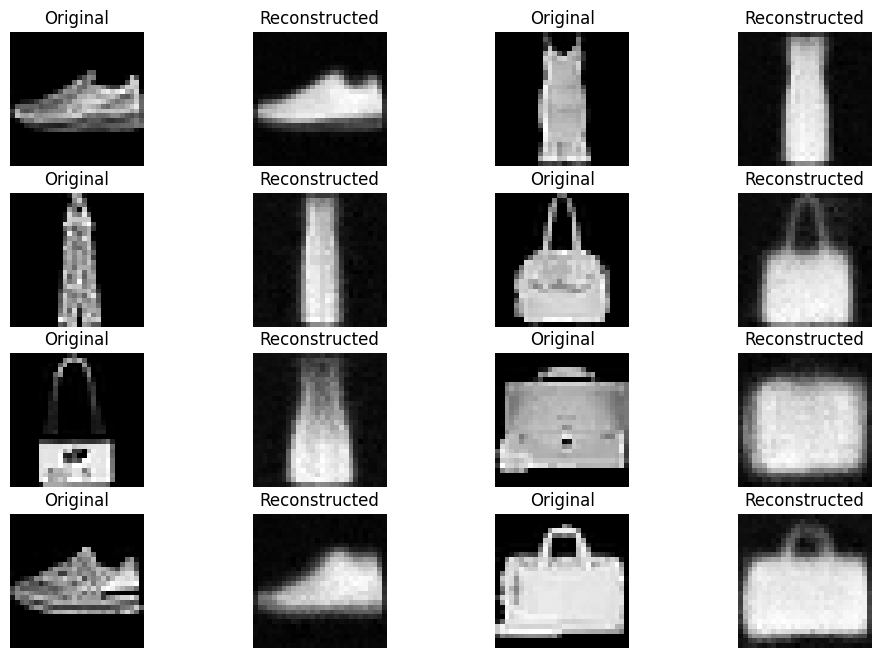

In [19]:
show_reconstructed(x_test,estimator)

In [20]:
plot_latent_space(x_test,y_test,estimator)